This code generates a random noise signal and a sample and hold input signal with a given sample rate. It then generates an initial sinusoidal signal with a random frequency and amplitude, and adapts it to the sample and hold input signal in each iteration. The resulting adapted sinusoidal signal is plotted along with the original sample and hold input signal. Note that the amplitude of the sample and hold input signal is used to scale the amplitude of the sinusoidal signal, and the frequency of the sample and hold input signal is used to update the frequency of the sinusoidal signal. The frequency and amplitude ranges for the sinusoidal signal can be adjusted to obtain different results.

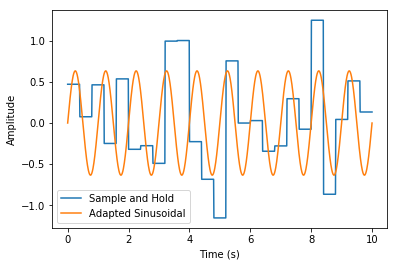

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define sample and hold function
def sample_and_hold(signal, rate):
    hold_signal = np.zeros_like(signal) # initialize hold signal
    last_sample = 0 # initialize last sample
    for i, s in enumerate(signal):
        if i % rate == 0: # sample signal at given rate
            last_sample = s
        hold_signal[i] = last_sample # hold last sample
    return hold_signal

# Define parameters
np.random.seed(1234) # set seed for reproducibility
t = np.linspace(0, 10, 1000) # time axis
freq_range = [0.01, 1] # frequency range for sinusoidal signal
amp_range = [0.5, 1.5] # amplitude range for sinusoidal signal
rate = 40 # sample rate of sample and hold signal

# Generate signals
noise = np.random.normal(0, 1, 1000) # random noise signal
hold_signal = sample_and_hold(noise, rate)
freq = np.random.uniform(*freq_range) # random frequency
amp = np.random.uniform(*amp_range) # random amplitude
sinusoidal = amp * np.sin(2*np.pi*freq*t)

# Adapt sinusoidal signal to sample and hold input signal
for i in range(1, len(t)):
    hold_period = t[i] - t[i-1] # period of sample and hold signal
    hold_amp = np.abs(hold_signal[i]) # amplitude of sample and hold signal
    freq = 1 / hold_period # calculate new frequency
    freq = np.clip(freq, *freq_range) # clip frequency to range
    amp = amp_range[0] + (amp_range[1] - amp_range[0]) * hold_amp # calculate new amplitude
    sinusoidal = amp * np.sin(2*np.pi*freq*t) # update sinusoidal signal

# Plot signals
plt.plot(t, hold_signal, label='Sample and Hold')
plt.plot(t, sinusoidal, label='Adapted Sinusoidal')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


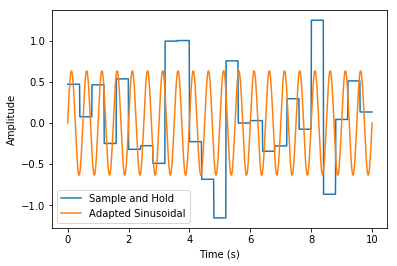

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define sample and hold function
def sample_and_hold(signal, rate):
    hold_signal = np.zeros_like(signal) # initialize hold signal
    last_sample = 0 # initialize last sample
    for i, s in enumerate(signal):
        if i % rate == 0: # sample signal at given rate
            last_sample = s
        hold_signal[i] = last_sample # hold last sample
    return hold_signal

# Define parameters
np.random.seed(1234) # set seed for reproducibility
t = np.linspace(0, 10, 1000) # time axis
freq_range = [0.5, 2] # frequency range for sinusoidal signal
amp_range = [0.5, 1.5] # amplitude range for sinusoidal signal
rate = 40 # sample rate of sample and hold signal
delay = 1 # delay of sinusoidal signal

# Generate signals
noise = np.random.normal(0, 1, 1000) # random noise signal
hold_signal = sample_and_hold(noise, rate)
freq = np.random.uniform(*freq_range) # random frequency
amp = np.random.uniform(*amp_range) # random amplitude
sinusoidal = amp * np.sin(2*np.pi*freq*(t-delay))

# Adapt sinusoidal signal to sample and hold input signal
for i in range(1, len(t)):
    hold_period = t[i] - t[i-1] # period of sample and hold signal
    hold_amp = np.abs(hold_signal[i]) # amplitude of sample and hold signal
    freq = 1 / hold_period # calculate new frequency
    freq = np.clip(freq, *freq_range) # clip frequency to range
    amp = amp_range[0] + (amp_range[1] - amp_range[0]) * hold_amp # calculate new amplitude
    sinusoidal = amp * np.sin(2*np.pi*freq*(t-delay)) # update sinusoidal signal

# Plot signals
plt.plot(t, hold_signal, label='Sample and Hold')
plt.plot(t, sinusoidal, label='Adapted Sinusoidal')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


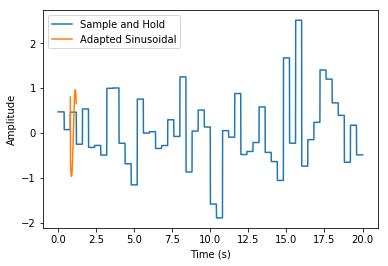

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define sample and hold function
def sample_and_hold(signal, rate):
    hold_signal = np.zeros_like(signal) # initialize hold signal
    last_sample = 0 # initialize last sample
    for i, s in enumerate(signal):
        if i % rate == 0: # sample signal at given rate
            last_sample = s
        hold_signal[i] = last_sample # hold last sample
    return hold_signal

# Define parameters
np.random.seed(1234) # set seed for reproducibility
t = np.linspace(0, 20, 2000) # time axis
freq_range = [0.5, 2] # frequency range for sinusoidal signal
amp_range = [0.5, 1.5] # amplitude range for sinusoidal signal
rate = 40 # sample rate of sample and hold signal
num_periods = 2 # number of periods to wait before generating sinusoidal output

# Generate signals
noise = np.random.normal(0, 1, len(t)) # random noise signal
hold_signal = sample_and_hold(noise, rate)

# Wait for a few periods before generating sinusoidal output
last_change_idx = 0
last_hold_sample = hold_signal[0]
for i, hold_sample in enumerate(hold_signal):
    if np.sign(hold_sample) != np.sign(last_hold_sample):
        if i - last_change_idx >= num_periods*rate:
            start_idx = last_change_idx + rate*num_periods
            end_idx = i
            break
        else:
            last_change_idx = i
    last_hold_sample = hold_sample
else:
    raise ValueError(f"No transition found within {num_periods} periods")

# Generate sinusoidal signal
freq = np.random.uniform(*freq_range) # random frequency
amp = np.random.uniform(*amp_range) # random amplitude
sinusoidal = amp * np.sin(2*np.pi*freq*t[start_idx:end_idx])

# Adapt sinusoidal signal to sample and hold input signal
for i in range(start_idx+1, end_idx):
    hold_period = t[i] - t[i-1] # period of sample and hold signal
    hold_amp = np.abs(hold_signal[i]) # amplitude of sample and hold signal
    freq = 1 / hold_period # calculate new frequency
    freq = np.clip(freq, *freq_range) # clip frequency to range
    amp = amp_range[0] + (amp_range[1] - amp_range[0]) * hold_amp # calculate new amplitude
    sinusoidal[i-start_idx] = amp * np.sin(2*np.pi*freq*t[i])

# Plot signals
plt.plot(t, hold_signal, label='Sample and Hold')
plt.plot(t[start_idx:end_idx], sinusoidal, label='Adapted Sinusoidal')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
